In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from twython import Twython
import json
import time

In [2]:

# Get keys from TWITTER_CREDS_FN or https://developer.twitter.com/en/apps/16087482
# NOTE: do not run this cell unless you get the API keys from twitter.com.
CONSUMER_KEY = 'e0cR4oCRsfqMQOIgSeZu18xGm'
CONSUMER_SECRET_KEY = 'ucPIEBnGCk6YJUmM8yV3FYbx8Fta1kzDzo4woPHZu1RdqmwGNp'
ACCESS_TOKEN_SECRET = '9waRhmgfqIUToRbrsqXw2qltAC7oDwgJef3aJV91PToaU'
TWITTER_CREDS_FN = '/Users/Che10/Downloads/.twitter-credentials.json'

if (CONSUMER_KEY != ''):
    twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET_KEY, oauth_version=2)
    ACCESS_TOKEN = twitter.obtain_access_token()

    # Save creds to json file
    creds = {'CONSUMER_KEY':CONSUMER_KEY, 'CONSUMER_SECRET_KEY':CONSUMER_SECRET_KEY,
             'ACCESS_TOKEN':ACCESS_TOKEN, 'ACCESS_TOKEN_SECRET':ACCESS_TOKEN_SECRET}
    with open(TWITTER_CREDS_FN, 'w') as outfile:  
        json.dump(creds, outfile)

In [3]:
try:
    with open(TWITTER_CREDS_FN) as data_file:
        data = json.load(data_file)
        CONSUMER_KEY = data['CONSUMER_KEY']
        CONSUMER_SECRET_KEY = data['CONSUMER_SECRET_KEY']
        ACCESS_TOKEN = data['ACCESS_TOKEN']
        ACCESS_TOKEN_SECRET = data['ACCESS_TOKEN_SECRET']
#         print('CONSUMER_KEY={}\nCONSUMER_SECRET_KEY={}\nACCESS_TOKEN={}\nACCESS_TOKEN_SECRET={}'.format(
#             CONSUMER_KEY, CONSUMER_SECRET_KEY, ACCESS_TOKEN, ACCESS_TOKEN_SECRET))
except IOError:
    print("Could not read file: ~/.twitter-credentials.json. Please Instantiate object with your username and password")

In [4]:
twitter = Twython(CONSUMER_KEY, access_token=ACCESS_TOKEN)


In [11]:
total_tweets = []
texts2=[]
MAX_ATTEMPTS = 1000

COUNT_OF_TWEETS_TO_BE_FETCHED = 450000

for i in range(0,MAX_ATTEMPTS):

    if(COUNT_OF_TWEETS_TO_BE_FETCHED < len(total_tweets)):
        break # we got 500 tweets... !!
        
    if(0 == i):
        results = twitter.search(q='virus', tweet_mode='extended', count=5000,geocode='40.730610,-73.935242,500km')['statuses']
    else:
        # After the first call we should have max_id from result of previous call. Pass it in query.
        results = twitter.search(q='virus', tweet_mode='extended', count=5000,geocode='40.730610,-73.935242,500km')['statuses']

    # STEP 2: Save the returned tweets
    
    for result in results:
        if 'retweeted_status' in result:
            result['full_text'] = result["retweeted_status"]['full_text']
    
        texts2 = result['full_text']
        total_tweets.append(texts2)


TwythonRateLimitError: Twitter API returned a 429 (Too Many Requests), Rate limit exceeded

In [7]:
len(total_tweets)

45000

In [8]:
total_tweets[44999]

"There's a surge in demand for telehealth and Zocdoc is building up its virtual appointments 👩🏾\u200d⚕️️👨🏽\u200d⚕️ https://t.co/YspI2MtYmc https://t.co/LjLHkurF2g"

In [10]:
total_tweets[0]

'@Alyssa_Milano Hunter Biden’s firm secured in Ukraine and China while his father, former VP Joe Biden\nJoe Biden called Trump’s China travel ban “xenophobic.”Now he is saying Trump should have done it sooner. Wake up! virus released to hurt Trump after impeachment failed. Libs bio warfare'

In [9]:
df_US=pd.DataFrame(total_tweets,columns=['tweet'])
df_US

,tweet
0,@Alyssa_Milano Hunter Biden’s firm secured in ...
1,Why is @realDonaldTrump being attacked for Nav...
2,@nliberacki @joepike @BorisJohnson You know......
3,My husband and I are recovering from COVID-19....
4,"@jvIiette Okay fair, that's what I get for not..."
...,...
44995,If Jennie dropped a hint about new music that ...
44996,A major model relied upon by @WhiteHouse #Medi...
44997,.@realDonaldTrump you cannot brand thoughts in...
44998,Another @LACProbation officer at a Sylmar dete...


In [12]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words1 = set(stopwords.words('english')) | set(['would', '#', '@'])

# df_title = pd.read_csv('data/titles_65k.csv', index_col=0)

df_US['tweet'] = df_US['tweet'].apply(lambda title: ' '.join([word for word in title.split() if word not in stop_words1]))
# df_title.to_csv('data/titles.csv')
df_US['tidy_tweet'] = df_US['tweet'].str.replace("[^a-zA-Z#]", " ")
df_US.sample(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Che10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet,tidy_tweet
7054,"@jvIiette Okay fair, that's I get taking scien...",jvIiette Okay fair that s I get taking scien...
29615,@RolandDunham @alyciaj09 @stopsolitaryct @kata...,RolandDunham alyciaj stopsolitaryct kata...
22845,My husband I recovering COVID-19. We’re gettin...,My husband I recovering COVID We re gettin...
2253,So sayin thing like virus something,So sayin thing like virus something
8751,What’s take-away us? It’s beating virus means ...,What s take away us It s beating virus means ...
6787,@pulte Thank helping need @pulte. Wish I could...,pulte Thank helping need pulte Wish I could...
17152,Why @realDonaldTrump attacked Navy firing Capt...,Why realDonaldTrump attacked Navy firing Capt...
40121,Detroit News objection Whitmer ignoring crisis...,Detroit News objection Whitmer ignoring crisis...
25683,NEW DEFENSIVE MEASURE AGAINST THE VIRUS -many ...,NEW DEFENSIVE MEASURE AGAINST THE VIRUS many ...
9779,Just tested negative virus. Thank goodness. No...,Just tested negative virus Thank goodness No...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Che10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


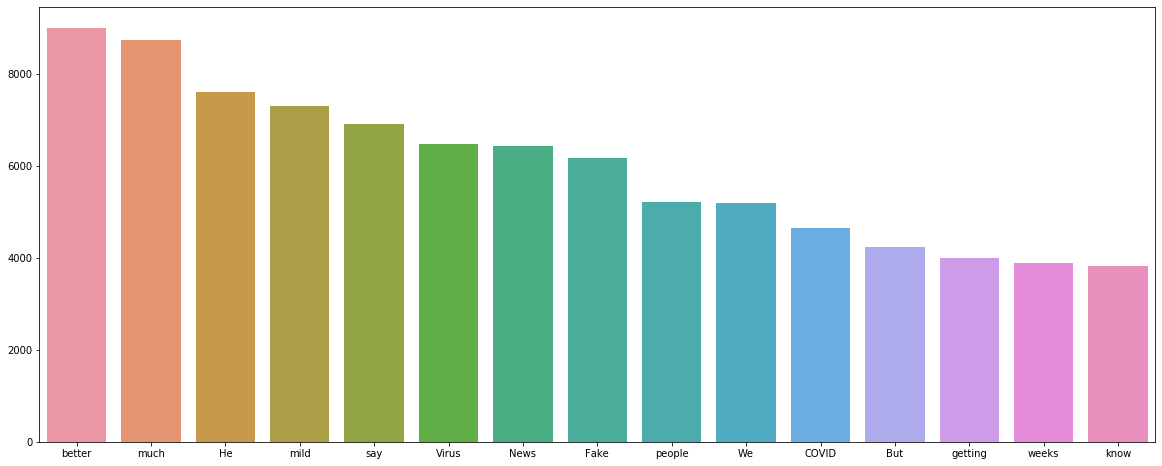

In [14]:
import seaborn as sns

from collections import defaultdict
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english')) | set(['Corona','RT','virus' ,'This','says','Listen','corona', 'https', 'co', 'As','The','I','r','amp'])

corpus = ''
for title in df_US['tidy_tweet']:
      corpus += title

word_freq_dict = defaultdict(int)
for word in [word for word in corpus.split() if word not in stop_words]:
        word_freq_dict[word] += 1

x = []
y = []
   
for word, count in sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True):
        x.append(word)
        y.append(count)        
plt.figure(figsize=((20,8)))
sns.barplot(x=x[:15], y=y[:15])

    
